# Importing Libraries

In [4]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Basic Features Analysis

Now, We want to do some analysis over the basic features we have created in order to see how efficent are those features in term of detecting duplicates quesitons, later on we will apply similar steps but on the advanced features that we will create soon.

In [6]:
train_data = pd.read_csv("/Data/train_data.csv", compression = "bz2")
test_data = pd.read_csv("/Data/test_data.csv", compression = "bz2")

In [ ]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_freq,question2_freq,len_diff,question1_n_words,question2_n_words,words_diff,words_common,words_share,frequency_sum,frequency_diff
0,84246,167321,167322,Which team will win the 2018 World Cup?,What teams will be in the 2018 World Cup?,1,39,41,1,1,2,8,9,1,5,0.294118,2,0
1,93023,184683,184684,"Which city is better to live, Dubai or Riyadh?",Is Riyadh a safe city to work?,0,46,30,1,1,16,9,7,2,3,0.187500,2,0
2,1134,2269,2270,What were Hillary Clinton's positive achieveme...,What is Hillary Clinton's greatest achievement...,1,72,71,1,1,1,10,11,1,7,0.333333,2,0
3,112175,222414,222415,Where can I find a list of companies in india ...,There are few startups in the US whose job des...,0,72,148,1,1,76,15,26,11,4,0.097561,2,0
4,277626,545847,545848,What video will show about 10 different extras...,Will the fight between the U.S. & Russia end l...,0,153,83,1,1,70,26,17,9,6,0.139535,2,0


In [ ]:
print("Number of rows in train data = ", train_data.shape[0])
print("Number of columns in train data = ", train_data.shape[1])

Number of rows in train data =  323478
Number of columns in train data =  18


In [ ]:
print("Number of rows in test data = ", test_data.shape[0])
print("Number of columns in test data = ", test_data.shape[1])

Number of rows in test data =  80870
Number of columns in test data =  18


For now we will focus on the following features:


*   len_diff

*   words_diff

*   words_common

*   words_share

*   frequency_sum

*   frequency_diff


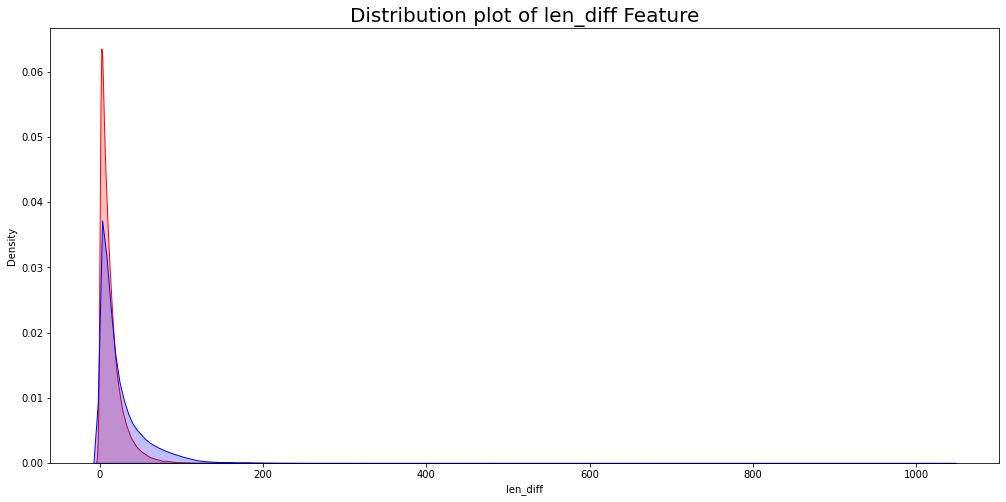

In [13]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["len_diff"], color = "red", fill = True)
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["len_diff"], color = "blue", fill = True)

plt.title("Distribution plot of len_diff Feature", size = 20)
plt.show()

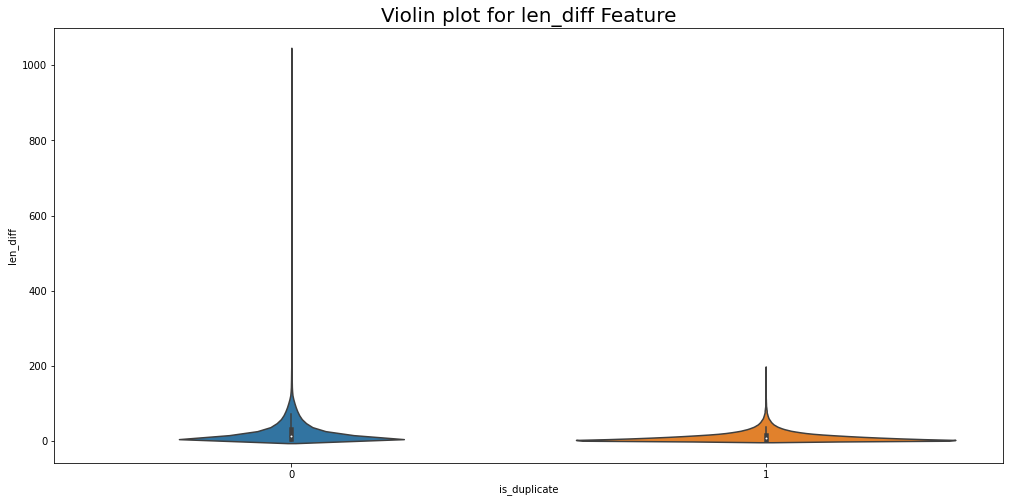

In [16]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "len_diff", data = train_data)

plt.show()

Now this is quite overlaping, although we can notice that the more diffrence in length between question1 and question2 the more data tend to be **not duplicate** as in the blue plot and from violin plot we can see that the long tail from the upper explain taht well even though some of large len_diff in the orange plot are with flag 1 but very few, but from above we can say that this is not very efficent feature.

let's continue analysing of our featuers, hope that some of them would be more efficent.

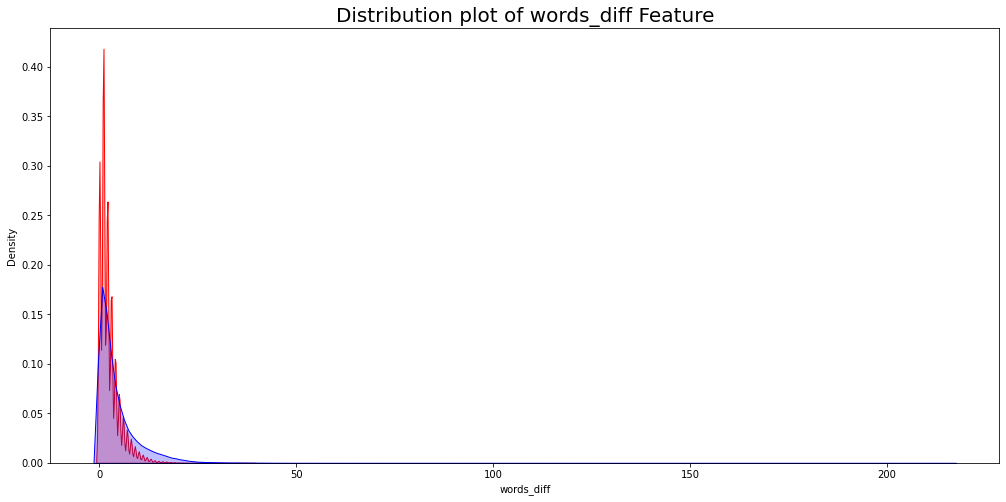

In [21]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["words_diff"], color = "red", fill = True)
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["words_diff"], fill = True, color = "blue")

plt.title("Distribution plot of words_diff Feature", size = 20)
plt.show()

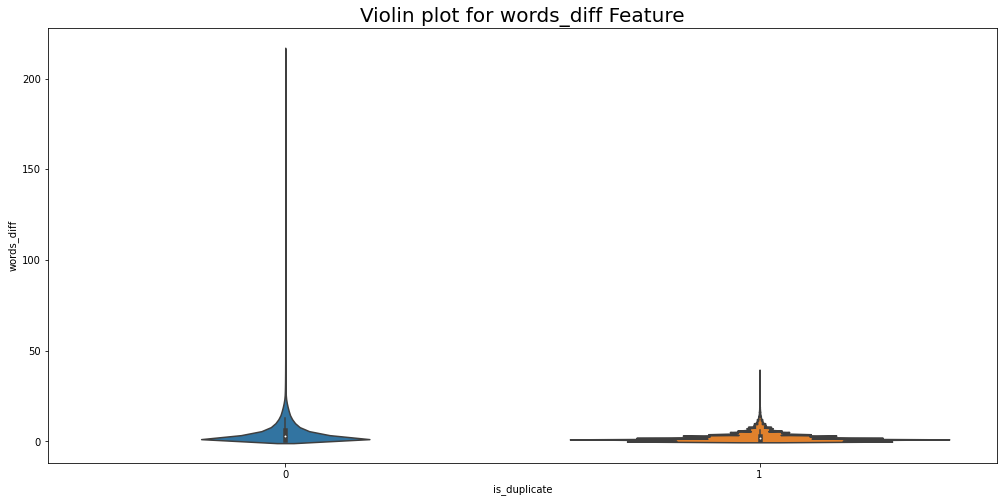

In [22]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "words_diff", data = train_data)

plt.title("Violin plot for words_diff Feature", size = 20)
plt.show()

This is kinda similar to len_diff feature as they are both come from the same idea of getting the diffrence in length between two question whether that is in term of number of characters aka len featuer or number of words, so it's clear to say that both features are not efficent regarding our task.

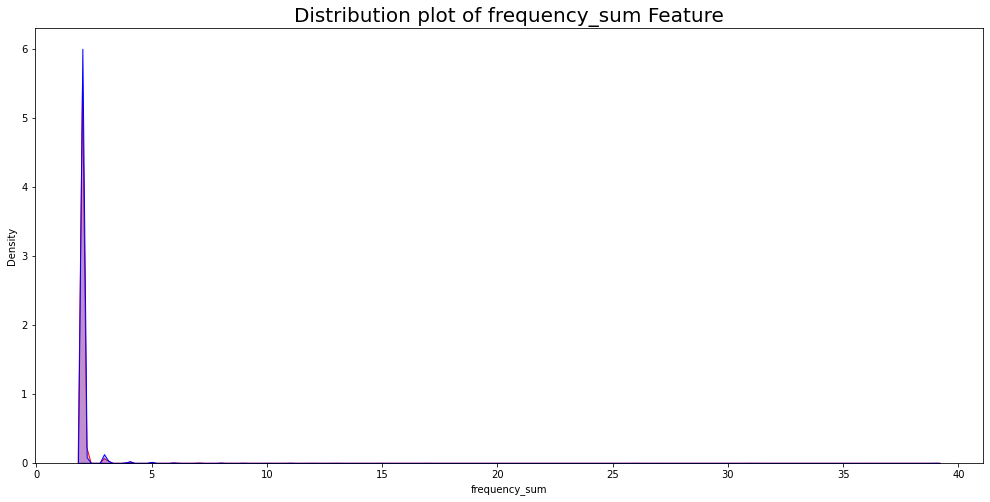

In [28]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["frequency_sum"], fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["frequency_sum"], fill = True, color = "blue")

plt.title("Distribution plot of frequency_sum Feature", size = 20)
plt.show()

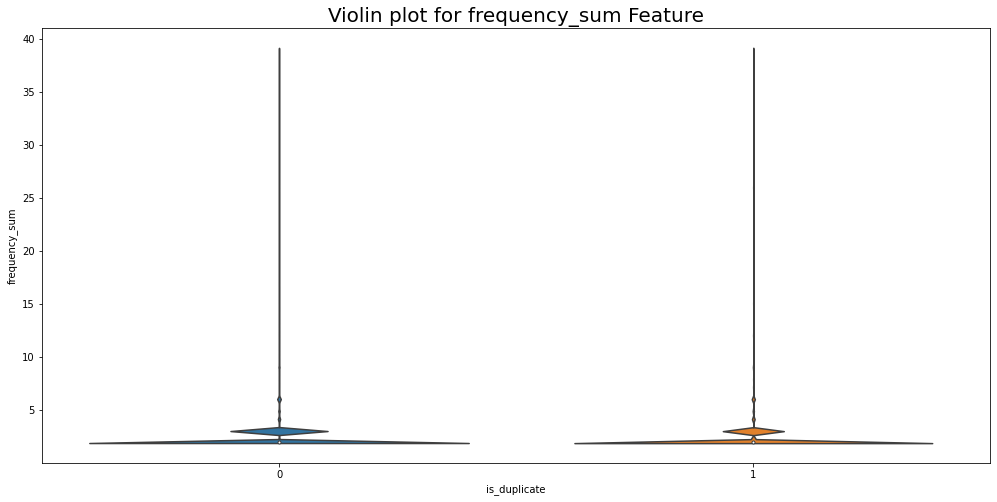

In [36]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "frequency_sum", data = train_data)

plt.title("Violin plot for frequency_sum Feature", size = 20)
plt.show()

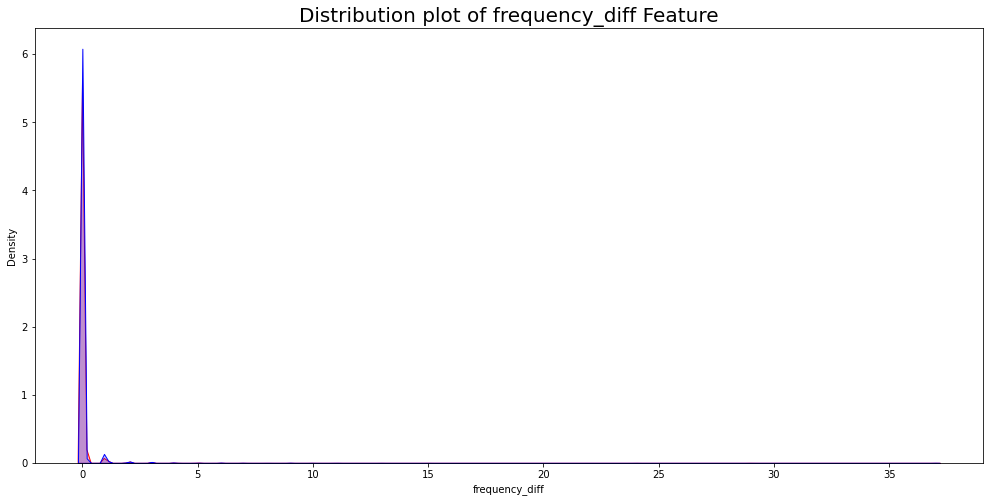

In [31]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["frequency_diff"], fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["frequency_diff"], fill = True, color = "blue")

plt.title("Distribution plot of frequency_diff Feature", size = 20)
plt.show()

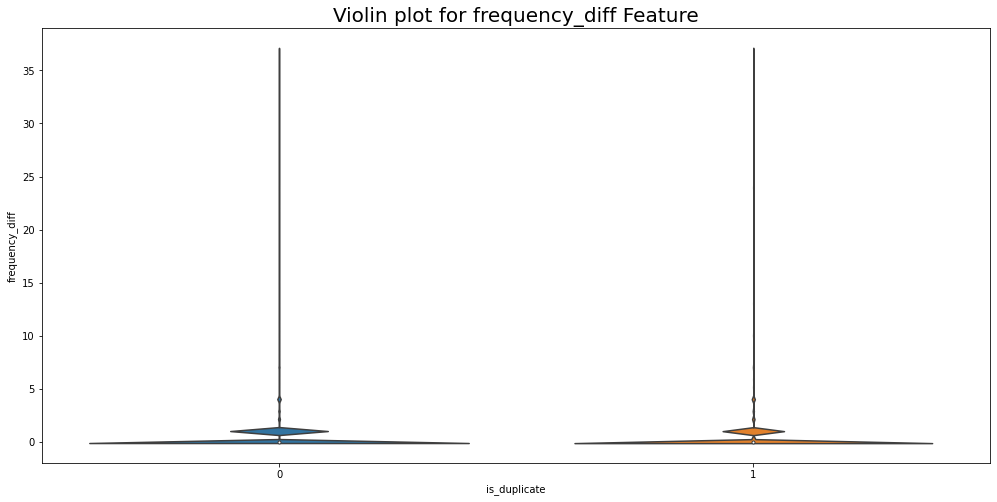

In [37]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "frequency_diff", data = train_data)

plt.title("Violin plot for frequency_diff Feature", size = 20)
plt.show()

Now from what we have seen it's safe to say that the dist of both data whether it's 1 or 0 is almost overlap and that make those features almost useless and we can't count on them really to develope robust and powerfull predictor so let's try the last two features we have, words_common and words_share.

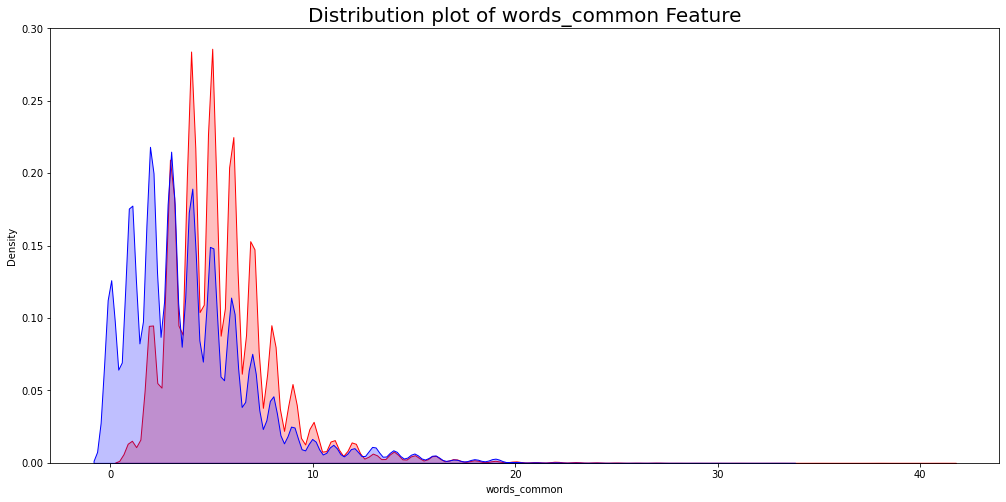

In [41]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["words_common"], fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["words_common"], fill = True, color = "blue")

plt.title("Distribution plot of words_common Feature", size = 20)
plt.show()

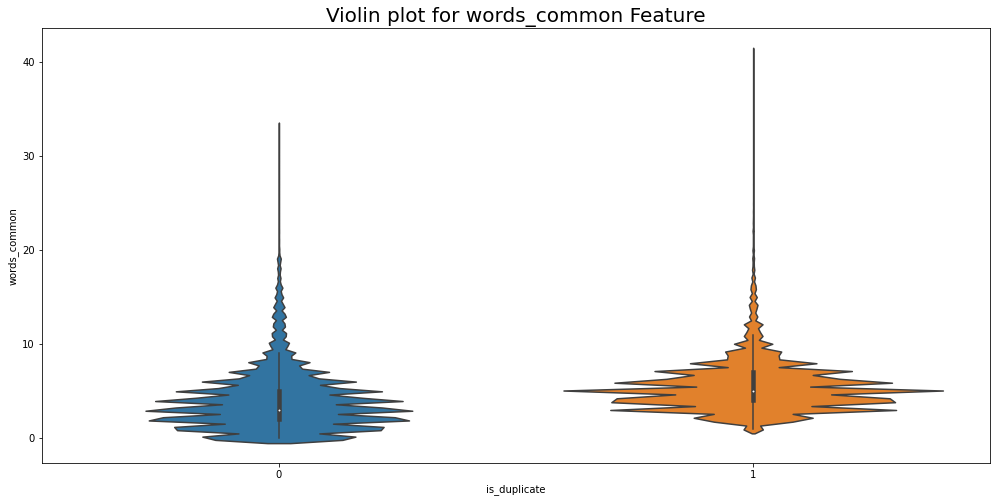

In [42]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "words_common", data = train_data)

plt.title("Violin plot for words_common Feature", size = 20)
plt.show()

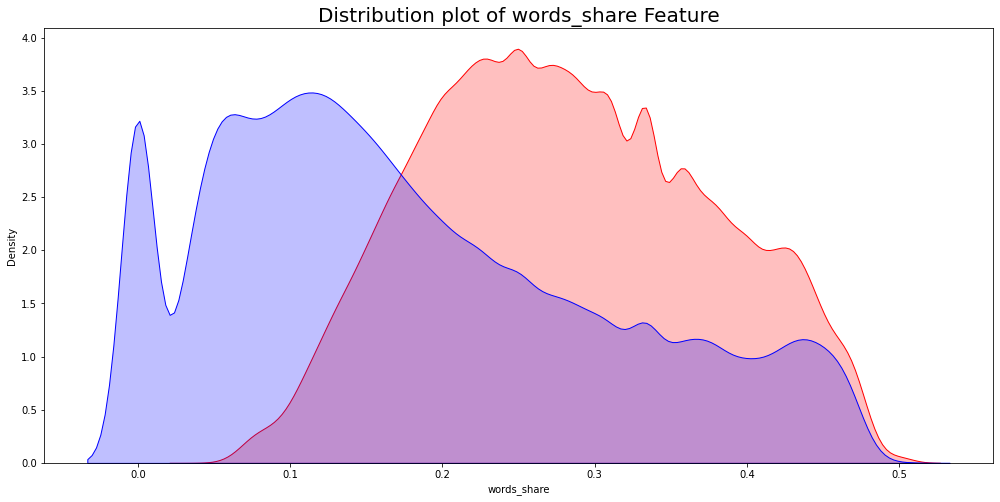

In [43]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["words_share"], fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["words_share"], fill = True, color = "blue")

plt.title("Distribution plot of words_share Feature", size = 20)
plt.show()

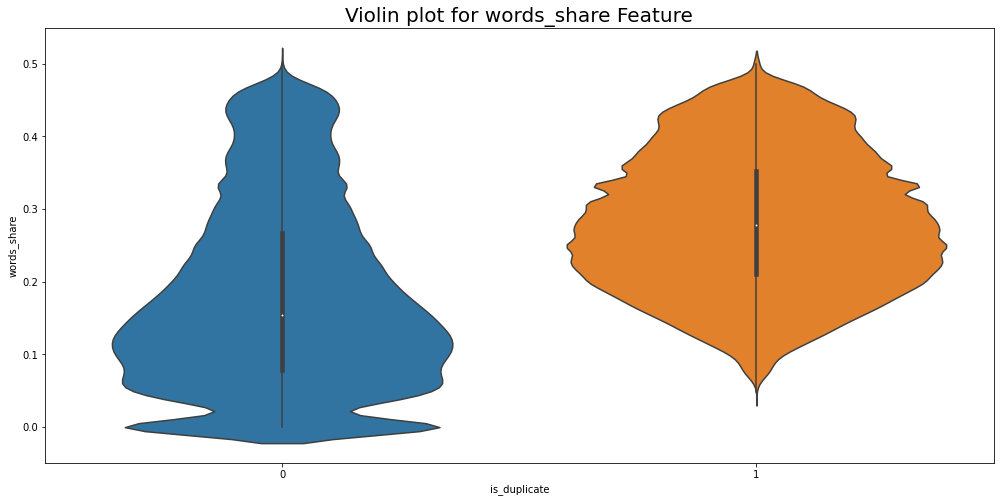

In [44]:
plt.figure(figsize = (17, 8))

sns.violinplot(x = "is_duplicate", y = "words_share", data = train_data)

plt.title("Violin plot for words_share Feature", size = 20)
plt.show()

As expected from those two features they are the most important features we have created so fat because looking at dist plot of them both espically words_share feature it provide some separation of the data based on it alone and it has a lot of diversity in term of values if we look at violin plot, so why don't we try to create some new features based on those features?!.

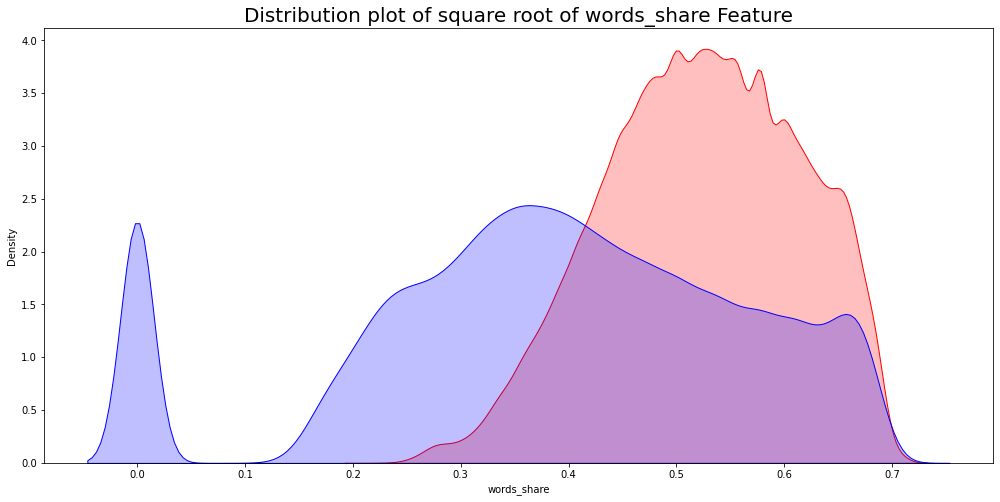

In [96]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["words_share"] ** 0.5, fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["words_share"] ** 0.5, fill = True, color = "blue")

plt.title("Distribution plot of square root of words_share Feature", size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


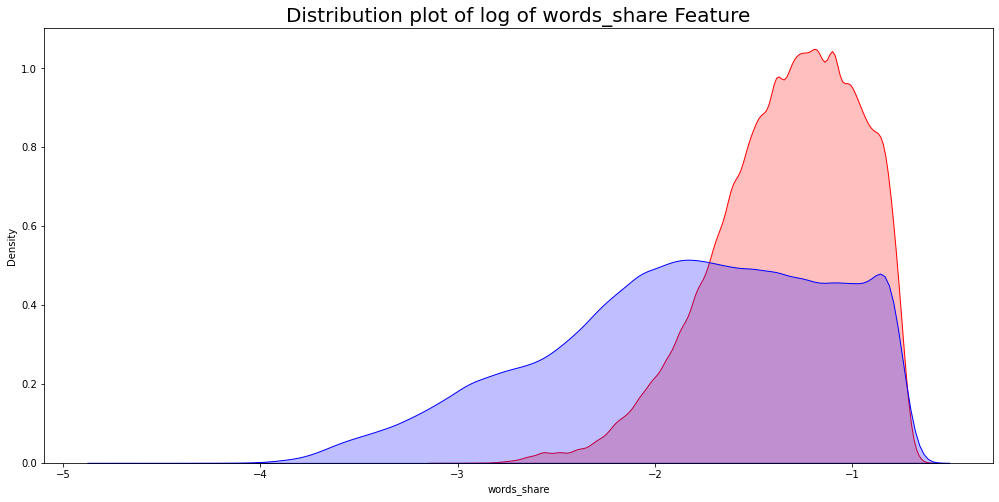

In [97]:
plt.figure(figsize = (17, 8))

sns.kdeplot(np.log(train_data[train_data["is_duplicate"] == 1]["words_share"]), fill = True, color = "red")
sns.kdeplot(np.log(train_data[train_data["is_duplicate"] == 0]["words_share"]), fill = True, color = "blue")

plt.title("Distribution plot of log of words_share Feature", size = 20)
plt.show()

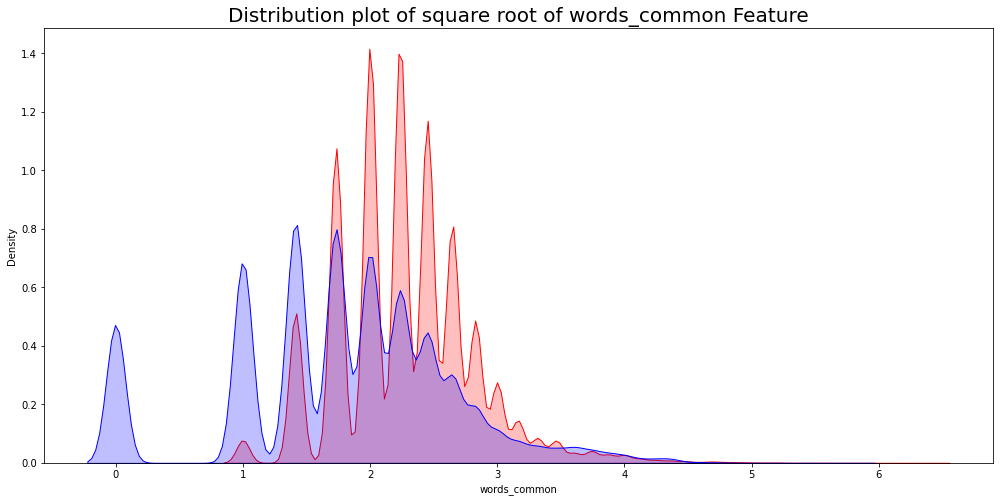

In [98]:
plt.figure(figsize = (17, 8))

sns.kdeplot(train_data[train_data["is_duplicate"] == 1]["words_common"] ** 0.5, fill = True, color = "red")
sns.kdeplot(train_data[train_data["is_duplicate"] == 0]["words_common"] ** 0.5, fill = True, color = "blue")

plt.title("Distribution plot of square root of words_common Feature", size = 20)
plt.show()

After trying some variation of words_common and words_share features those 3 variations are the most useful one and worth to be added to our data.

In [101]:
t1 = (train_data["words_share"]) ** 0.5
t2 = np.log(train_data["words_share"])
t3 = (train_data["words_common"]) ** 0.5

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [102]:
train_data["words_share_square"] = t1
train_data["words_share_log"] = t2
train_data["words_common_square"] = t3

In [103]:
t1 = (test_data["words_share"]) ** 0.5
t2 = np.log(test_data["words_share"])
t3 = (test_data["words_common"]) ** 0.5

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [104]:
test_data["words_share_square"] = t1
test_data["words_share_log"] = t2
test_data["words_common_square"] = t3

In [110]:
print("Basic Features:")
train_data.columns.tolist()

Basic Features:


['id',
 'qid1',
 'qid2',
 'question1',
 'question2',
 'is_duplicate',
 'question1_len',
 'question2_len',
 'question1_freq',
 'question2_freq',
 'len_diff',
 'question1_n_words',
 'question2_n_words',
 'words_diff',
 'words_common',
 'words_share',
 'frequency_sum',
 'frequency_diff',
 'words_share_square',
 'words_share_log',
 'words_common_square']

In [105]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_freq,question2_freq,len_diff,question1_n_words,question2_n_words,words_diff,words_common,words_share,frequency_sum,frequency_diff,words_share_square,words_share_log,words_common_square
0,84246,167321,167322,Which team will win the 2018 World Cup?,What teams will be in the 2018 World Cup?,1,39,41,1,1,2,8,9,1,5,0.294118,2,0,0.542326,-1.223775,2.236068
1,93023,184683,184684,"Which city is better to live, Dubai or Riyadh?",Is Riyadh a safe city to work?,0,46,30,1,1,16,9,7,2,3,0.187500,2,0,0.433013,-1.673976,1.732051
2,1134,2269,2270,What were Hillary Clinton's positive achieveme...,What is Hillary Clinton's greatest achievement...,1,72,71,1,1,1,10,11,1,7,0.333333,2,0,0.577350,-1.098612,2.645751
3,112175,222414,222415,Where can I find a list of companies in india ...,There are few startups in the US whose job des...,0,72,148,1,1,76,15,26,11,4,0.097561,2,0,0.312348,-2.327278,2.000000
4,277626,545847,545848,What video will show about 10 different extras...,Will the fight between the U.S. & Russia end l...,0,153,83,1,1,70,26,17,9,6,0.139535,2,0,0.373544,-1.969441,2.449490


In [111]:
train_data.to_csv("/Data/train_data.csv", index = False, compression = "bz2")
test_data.to_csv("/Data/test_data.csv", index = False, compression = "bz2")